<a href="https://colab.research.google.com/github/jagjeetkaur123/aws-codepipeline-s3-codedeploy-linux/blob/master/GradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 
import warnings
warnings.filterwarnings('ignore')

In [5]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns= boston.feature_names)
y = pd.Series(boston.target)

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
gradientregressor = GradientBoostingRegressor(max_depth = 2, n_estimators=3, learning_rate=1.0)

In [11]:
model = gradientregressor.fit(X_train, y_train)

In [12]:
y_pred = model.predict(X_test)

In [13]:
r2_score(y_pred, y_test)

0.6894155880799502

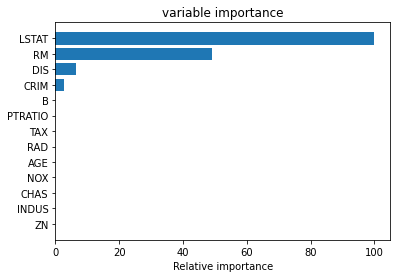

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline
feature_importance = model.feature_importances_
feature_importance = 100.0*(feature_importance/ feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative importance')
plt.title('variable importance')
plt.show()

